In [41]:
import numpy as np
import matplotlib.pyplot as plt

image_file = '../data/raw/pannuke/Fold 1/images/fold1/images.npy'
mask_file = '../data/raw/pannuke/Fold 1/masks/fold1/masks.npy'

images = np.load(image_file)
masks = np.load(mask_file)

sample_index = 0
sample_image = images[sample_index]
sample_mask = masks[sample_index]


In [42]:
types_path = '../data/raw/pannuke/Fold 1/images/fold1/types.npy' 
types = np.load(types_path)

print(f"Types shape: {types.shape}")
print(f"Unique types: {np.unique(types)}")

Types shape: (2656,)
Unique types: ['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']


In [43]:
single_masks = masks[:, :, :, -1]
single_masks = np.expand_dims(single_masks, axis=-1)
single_masks.shape

(2656, 256, 256, 1)

In [11]:
np.save('single_mask.npy', single_masks)

In [46]:
types_file = '../data/raw/pannuke/Fold 1/images/fold1/types.npy'
types = np.load(types_file)
colon_indices = np.where(np.logical_or(types == 'Colon', types == 'Stomach'))[0]

# Convert to list if needed
colon_indices_list = colon_indices.tolist()

single_masks = single_masks[colon_indices_list]

In [48]:
print(len(colon_indices_list))

528


528

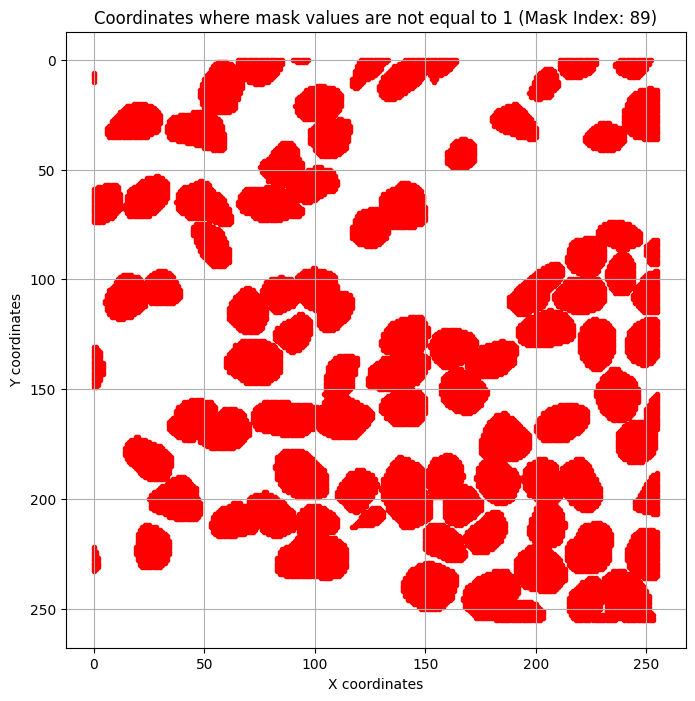

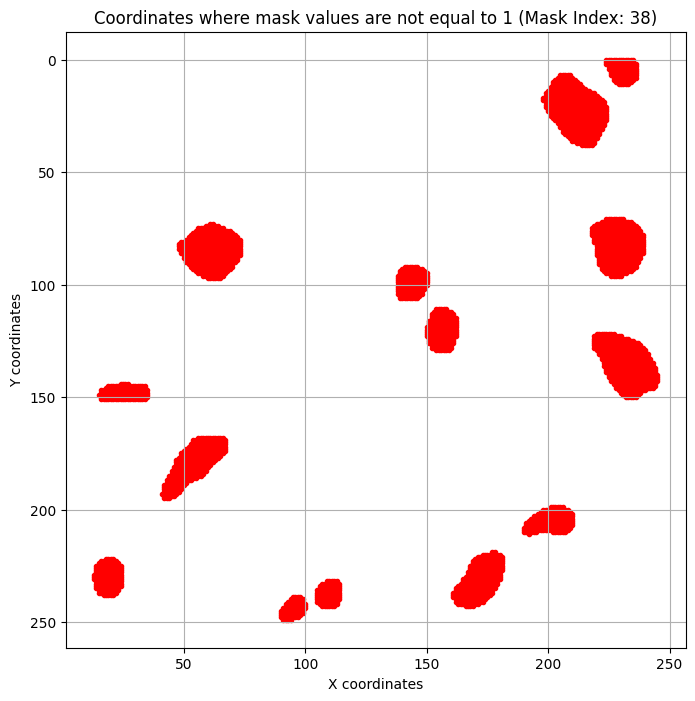

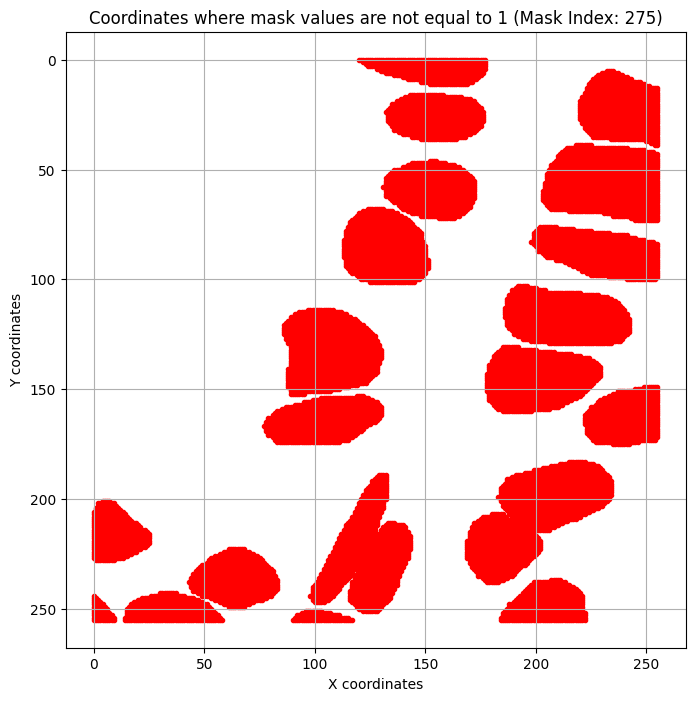

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming single_masks is already defined and loaded
# Make sure to pick random samples within the range of single_masks
random_indices = random.sample(range(len(single_masks)), 3)

for i in random_indices:
    mask = single_masks[i].squeeze()  # Ensure mask is 2D

    non_one_indices = np.where(mask != 1)
    y_coords, x_coords = non_one_indices

    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, marker='.', color='red')
    plt.title(f'Coordinates where mask values are not equal to 1 (Mask Index: {i})')
    plt.xlabel('X coordinates')
    plt.ylabel('Y coordinates')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.grid(True)
    plt.show()


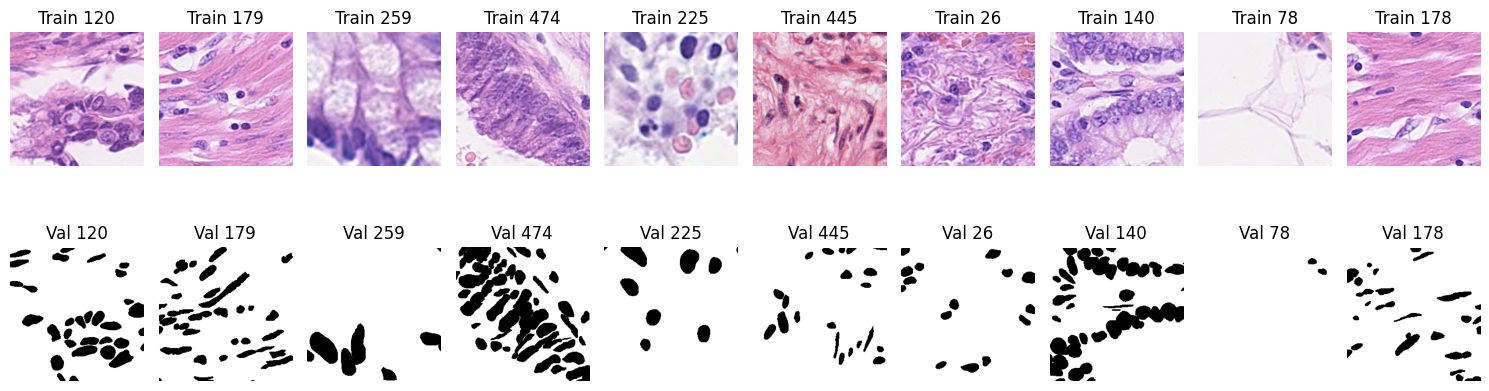

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

images = images[colon_indices_list]
# Call the function with your data
plot_random_samples(images, single_masks)


In [105]:
import numpy as np

# Filter out masks where all values are 1
non_all_ones_indices = [i for i, mask in enumerate(single_masks) if not np.all(mask == 1)]
print(non_all_ones_indices)
# Filter the images and masks using these indices
filtered_images = images[non_all_ones_indices]
filtered_masks = single_masks[non_all_ones_indices]

print(f"Filtere number of images: {len(filtered_images)}")
print(f"# of masks after filtering: {len(filtered_masks)}")


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233,

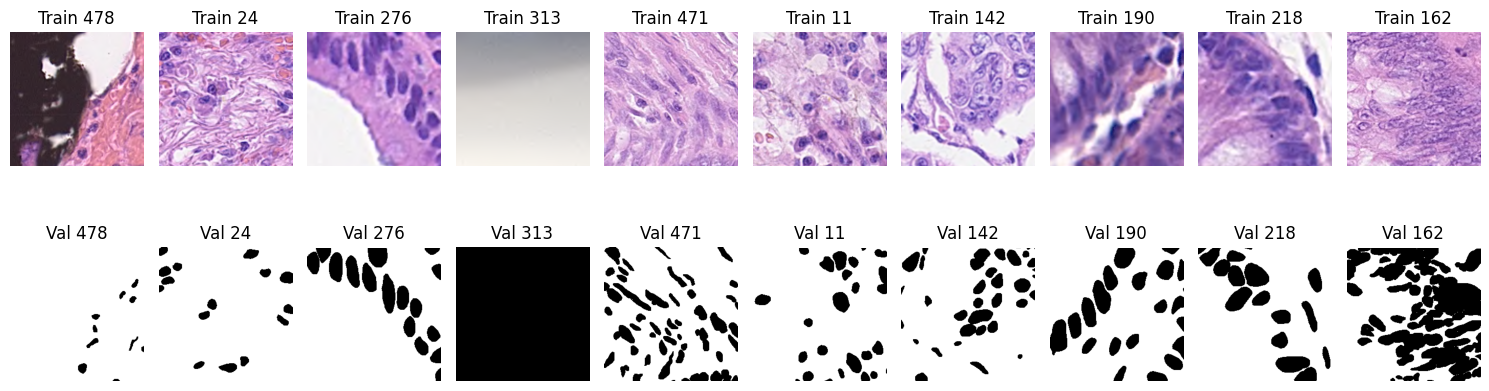

In [106]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_samples(filtered_images, filtered_masks)


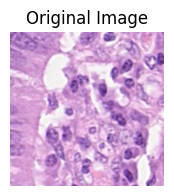

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = images[0]

# Function to display an image
def display_image(image, title='Image'):
    plt.figure(figsize=(2, 2))
    plt.imshow(image.astype(np.uint8))  # Ensure image is in uint8 format for correct display
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Display the original image
display_image(img, title='Original Image')

In [108]:
def rgb_to_od(img):
    img = img.astype(np.float32)
    img[img == 0] = 1  # Avoid division by zero
    return -np.log(img / 255)

img_od = rgb_to_od(img)

In [109]:
reshaped_od = img_od.reshape((-1, 3))
pca = PCA(n_components=2)
pca.fit(reshaped_od)
stain_matrix = pca.components_.T

In [110]:
stains = np.dot(reshaped_od, np.linalg.pinv(stain_matrix).T)

In [111]:
stains = stains.reshape(img.shape[0], img.shape[1], -1)

In [112]:
target_means = np.array([0.5, 0.5])
target_stds = np.array([0.2, 0.2])
stains_normalized = (stains - np.mean(stains, axis=(0, 1))) / np.std(stains, axis=(0, 1))
stains_normalized = stains_normalized * target_stds + target_means

In [113]:
od_normalized = np.dot(stains_normalized.reshape((-1, 2)), stain_matrix.T)
od_normalized = od_normalized.reshape(img.shape)
img_reconstructed = np.exp(-od_normalized)

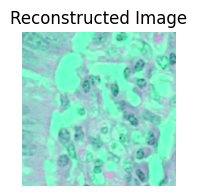

In [114]:
# Display the original image
img_reconstructed = np.clip(img_reconstructed, 0, 1)
img_reconstructed = (img_reconstructed * 255).astype(np.uint8)
display_image(img_reconstructed, title='Reconstructed Image')

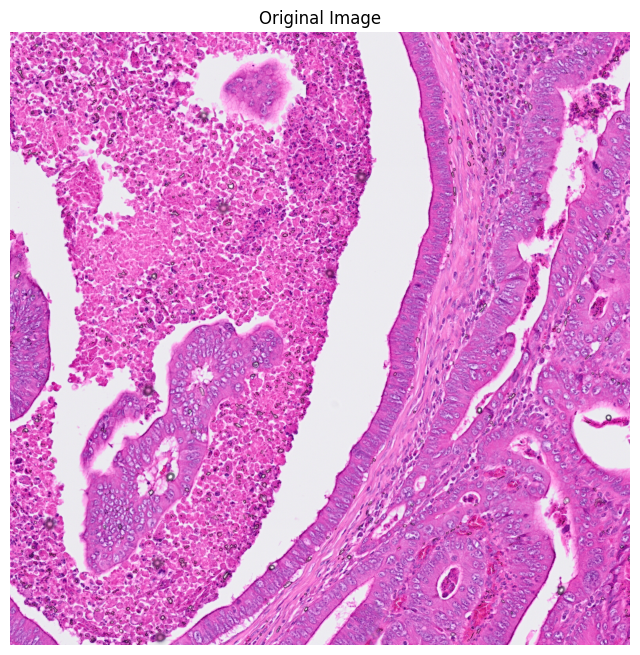

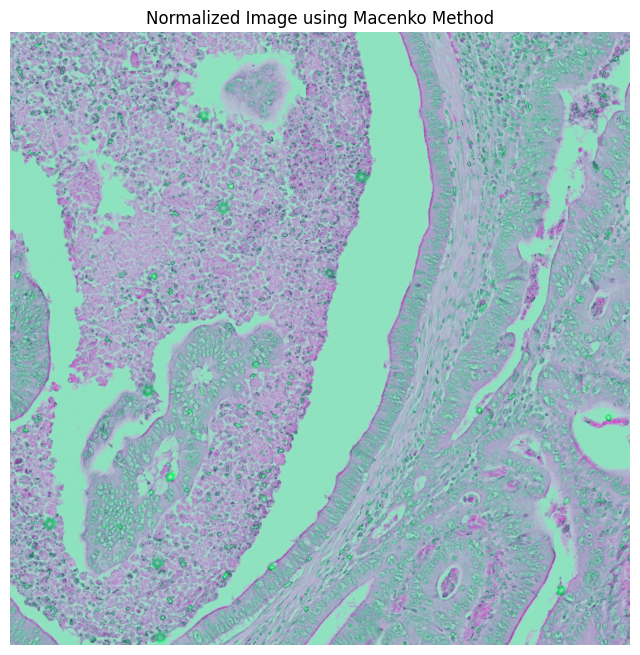

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Macenko Stain Normalization Functions
def rgb_to_od(img):
    img = img.astype(np.float32)
    img[img == 0] = 1  # Avoid division by zero
    return -np.log(img / 255)

def normalize_stains(image, target_means, target_stds):
    # Convert RGB to Optical Density (OD)
    img_od = rgb_to_od(image)

    # Reshape for PCA
    reshaped_od = img_od.reshape((-1, 3))

    # Perform PCA to find the stain matrix
    pca = PCA(n_components=2)
    pca.fit(reshaped_od)
    stain_matrix = pca.components_.T

    # Calculate stains
    stains = np.dot(reshaped_od, np.linalg.pinv(stain_matrix).T)
    stains = stains.reshape(img_od.shape[0], img_od.shape[1], -1)

    # Normalize stains
    stains_normalized = (stains - np.mean(stains, axis=(0, 1))) / np.std(stains, axis=(0, 1))
    stains_normalized = stains_normalized * target_stds + target_means

    # Convert back to OD space
    od_normalized = np.dot(stains_normalized.reshape((-1, 2)), stain_matrix.T)
    od_normalized = od_normalized.reshape(image.shape)

    # Reconstruct image from OD
    img_reconstructed = np.exp(-od_normalized)
    img_reconstructed = np.clip(img_reconstructed, 0, 1)
    img_reconstructed = (img_reconstructed * 255).astype(np.uint8)

    return img_reconstructed

def plot_image(image, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage
dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
img = read_image(dir_base + filename)

# Define target means and stds
target_means = np.array([0.5, 0.5])
target_stds = np.array([0.2, 0.2])

# Normalize the image using the Macenko method
img_macenko = normalize_stains(img, target_means, target_stds)

# Plot original and normalized images
plot_image(img, "Original Image")
plot_image(img_macenko, "Normalized Image using Macenko Method")


In [117]:
# Assuming images_macenko is a list of images
images_macenko = [np.array(img) for img in images_macenko]  # Ensure all items are numpy arrays

# Convert the list of images to a NumPy array
images_macenko_array = np.array(images_macenko)

# Alternatively, if images are of the same shape and you want to stack them along a new dimension
images_macenko_array = np.stack(images_macenko, axis=0)

# Print the shape of the resulting NumPy array
print(f"Shape of images_macenko_array: {images_macenko_array.shape}")

Shape of images_macenko_array: (499, 256, 256, 3)


In [118]:
print(filtered_masks.shape)
print(images_macenko_array.shape)

(499, 256, 256, 1)
(499, 256, 256, 3)


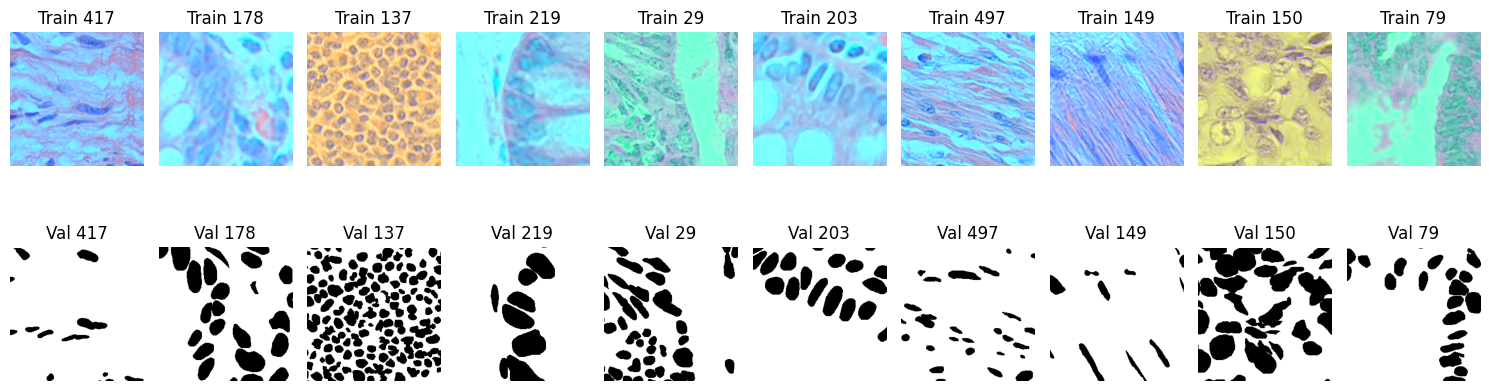

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_samples(images_macenko_array, filtered_masks)


In [ ]:
#Macenko for Visium image

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(images_macenko_array, filtered_masks, test_size=0.2, random_state=40)

In [121]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(399, 256, 256, 3)
(100, 256, 256, 3)
(399, 256, 256, 1)
(100, 256, 256, 1)


In [122]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import os

def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)

    return model


In [123]:
model = unet_model()

In [124]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 256, 256,  │      1,792 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_57[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_59[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_61[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 32, 32,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_63[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 16, 16,    │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_65[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_12 │ (None, 32, 32,    │  2,097,664 │ conv2d_66[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 32, 32,    │          0 │ conv2d_64[0][0],

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
history = model.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_val, Y_val))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 564s 22s/step - accuracy: 0.6119 - loss: 6.9285 - val_accuracy: 0.7416 - val_loss: 0.5146
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 516s 21s/step - accuracy: 0.7850 - loss: 0.4844 - val_accuracy: 0.8358 - val_loss: 0.4124
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 522s 21s/step - accuracy: 0.7751 - loss: 0.5152 - val_accuracy: 0.8129 - val_loss: 0.4435
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 515s 21s/step - accuracy: 0.7996 - loss: 0.4788 - val_accuracy: 0.8316 - val_loss: 0.4140
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 516s 21s/step - accuracy: 0.7953 - loss: 0.4693 - val_accuracy: 0.8323 - val_loss: 0.4102


In [126]:
model.save('../data/processed/pannuke/colon_and_stomach_5e_M.h5')

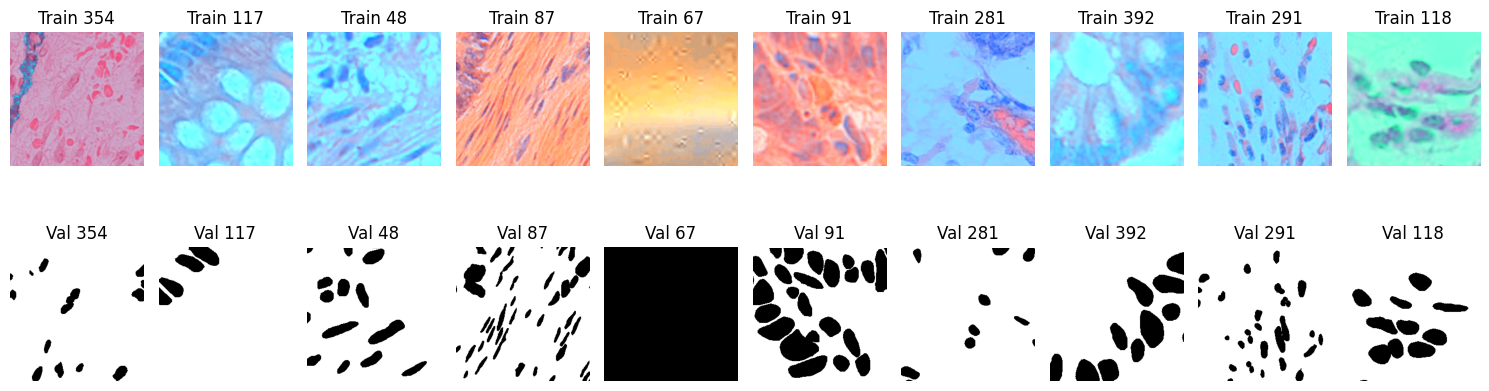

In [127]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_samples(X_train, Y_train, num_samples=10):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_samples, replace=False)

    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    # Plot random samples from X_train
    for i, idx in enumerate(random_indices):
        ax = axes[0, i]
        ax.imshow(X_train[idx].astype(int), cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Train {idx}")
        ax.axis('off')

    # Plot random samples from Y_train
    for i, idx in enumerate(random_indices):
        ax = axes[1, i]
        ax.imshow(Y_train[idx], cmap='gray')  # Assuming grayscale images, adjust cmap for RGB
        ax.set_title(f"Val {idx}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_samples(X_train, Y_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


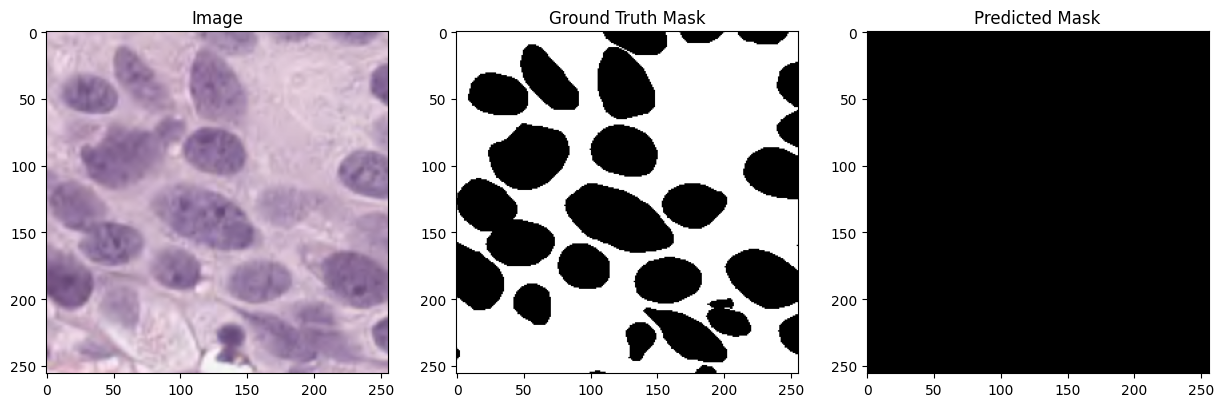

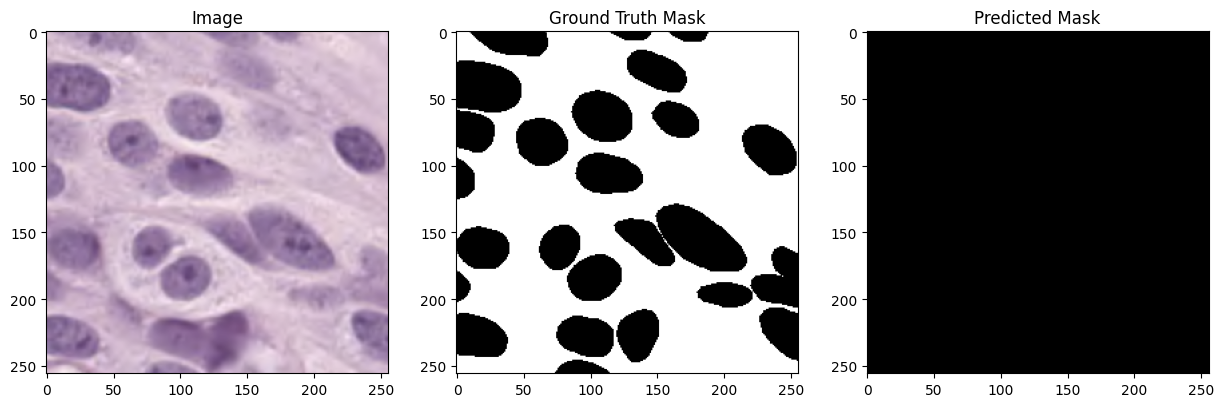

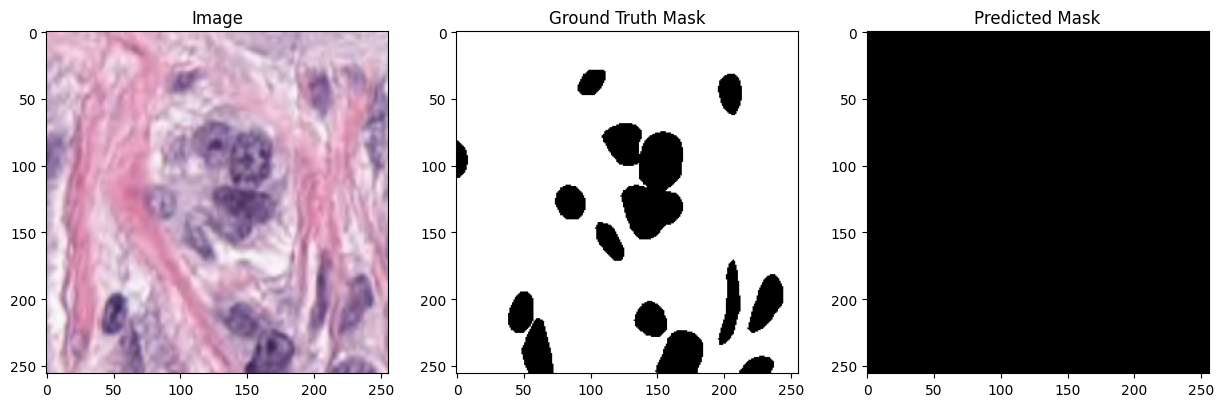

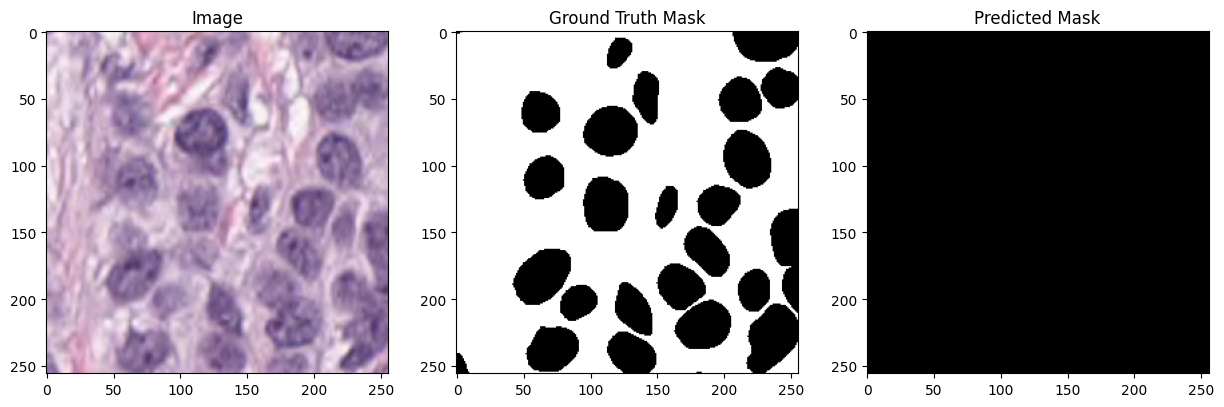

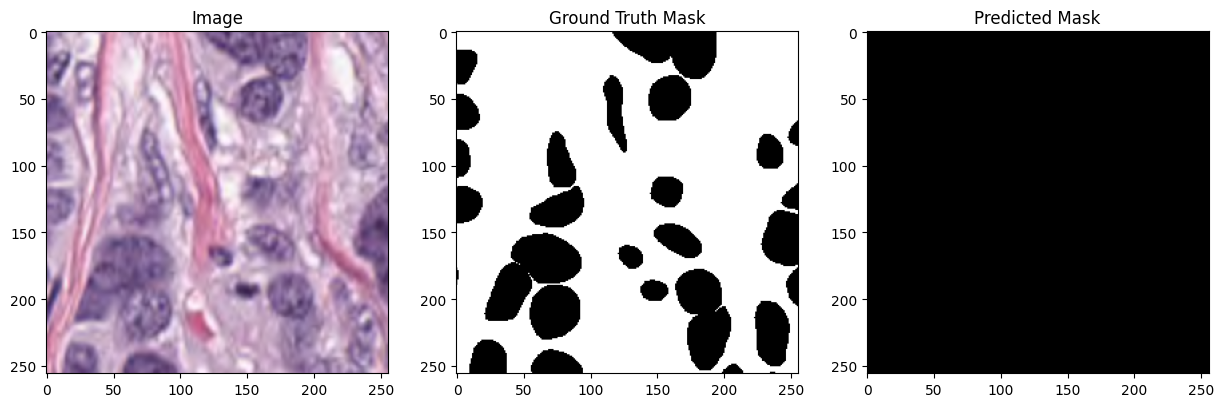

In [129]:
import numpy as np
import matplotlib.pyplot as plt

images = np.load(image_file)
masks = np.load(mask_file)
X_test = images[510:530]
masks = np.load(mask_file)
masks = masks[:, :, :, -1]
Y_test = masks[510:530]

# TODO Normalize? i did not do it yet
# X_test = X_test / 255.0

Y_pred = model.predict(X_test.astype(float))

# Reshape predictions to match ground truth
Y_pred_thresholded = (Y_pred > 0.5).astype(np.uint8)

# Remove the last channel dimension
Y_pred_thresholded = np.squeeze(Y_pred_thresholded, axis=-1)


def plot_sample(image, true_mask, pred_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image.astype(int))
    axes[0].set_title('Image')
    axes[1].imshow(true_mask.squeeze(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[2].imshow(pred_mask.squeeze(), cmap='gray')
    axes[2].set_title('Predicted Mask')
    plt.show()

for i in range(5):
    plot_sample(X_test[i], Y_test[i], Y_pred_thresholded[i])


In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

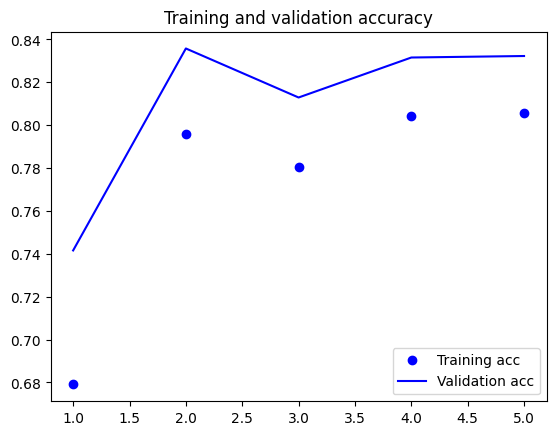

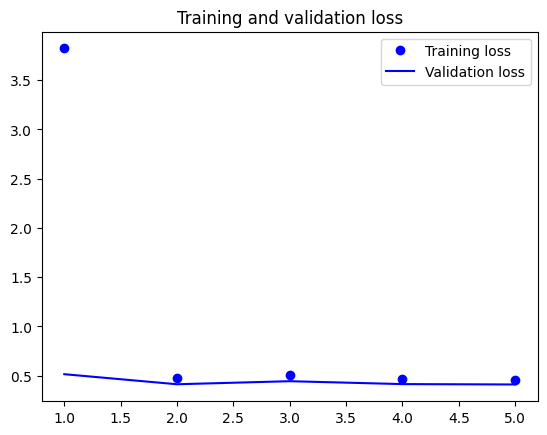

In [130]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step


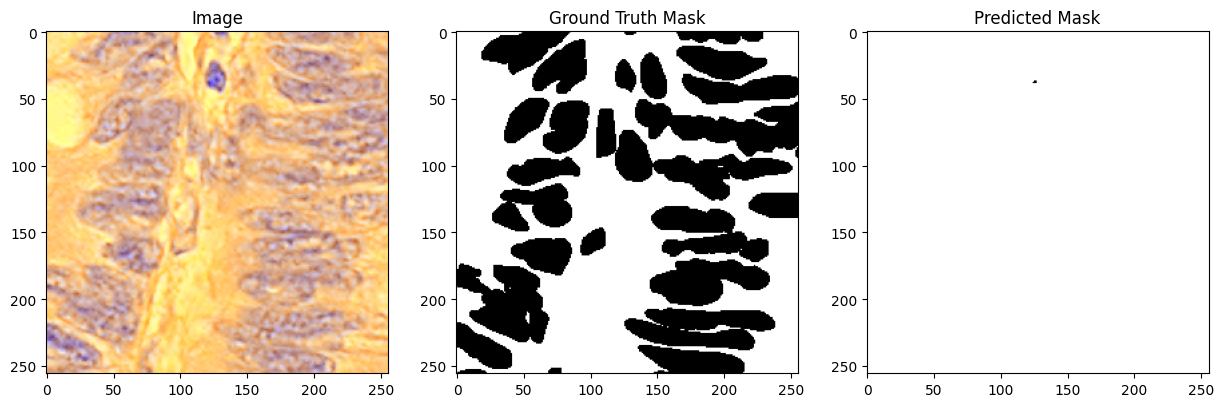

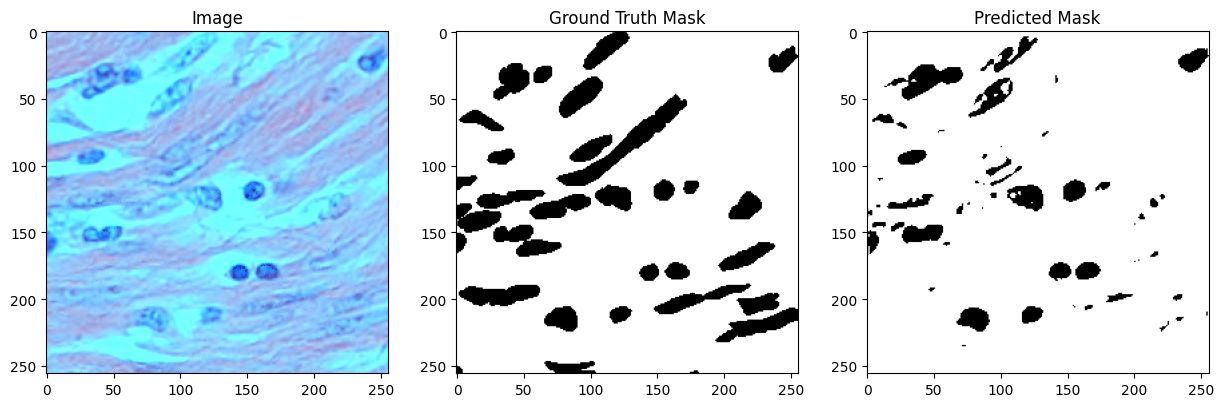

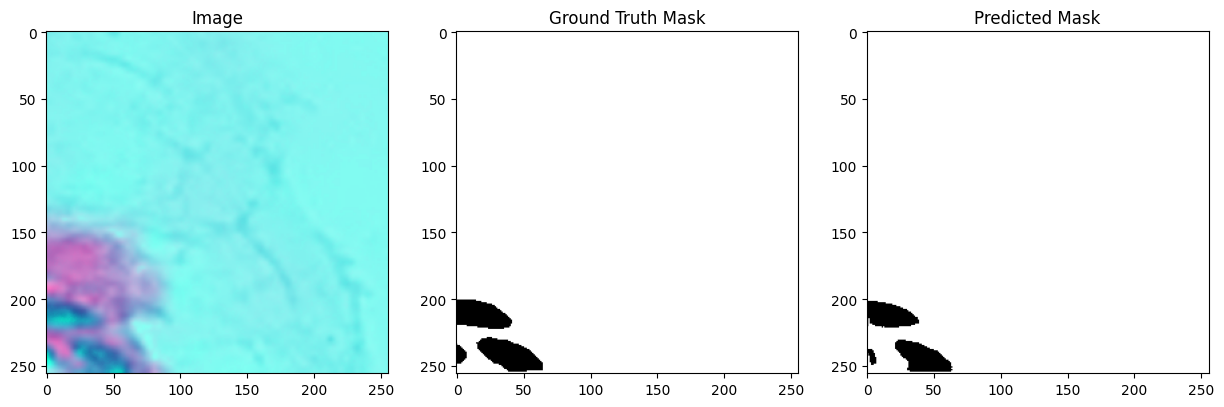

In [134]:
import numpy as np
import matplotlib.pyplot as plt

X_test = X_val[:3]
masks = np.load(mask_file)
masks = masks[:, :, :, -1]
Y_test = Y_val[:3]

# TODO Normalize? i did not do it yet
# X_test = X_test / 255.0

Y_pred = model.predict(X_test)

# Reshape predictions to match ground truth
Y_pred_thresholded = (Y_pred > 0.5).astype(np.uint8)

# Remove the last channel dimension
Y_pred_thresholded = np.squeeze(Y_pred_thresholded, axis=-1)


def plot_sample(image, true_mask, pred_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image.astype(int))
    axes[0].set_title('Image')
    axes[1].imshow(true_mask.squeeze(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[2].imshow(pred_mask.squeeze(), cmap='gray')
    axes[2].set_title('Predicted Mask')
    plt.show()

for i in range(3):
    plot_sample(X_test[i], Y_test[i], Y_pred_thresholded[i])


In [135]:

import sys
sys.path.append('../utils')
import os
import image_cropp_utils

from image_cropp_utils import read_image

dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
img = read_image(dir_base + filename)

In [136]:
print(img.astype(float))

[[[166.  33. 138.]
  [147.  14. 119.]
  [153.  16. 122.]
  ...
  [239. 107. 209.]
  [218.  87. 193.]
  [171.  42. 161.]]

 [[209.  77. 179.]
  [189.  57. 158.]
  [184.  48. 150.]
  ...
  [240. 110. 210.]
  [223.  94. 197.]
  [187.  58. 176.]]

 [[236. 105. 201.]
  [227.  96. 192.]
  [214.  83. 179.]
  ...
  [244. 116. 213.]
  [231. 105. 205.]
  [200.  71. 187.]]

 ...

 [[226. 131. 215.]
  [224. 124. 210.]
  [214. 109. 201.]
  ...
  [220.  97. 201.]
  [223.  95. 204.]
  [220.  89. 201.]]

 [[241. 158. 230.]
  [238. 150. 226.]
  [228. 133. 217.]
  ...
  [216.  96. 196.]
  [221.  95. 202.]
  [224.  94. 203.]]

 [[251. 177. 238.]
  [254. 173. 240.]
  [244. 158. 233.]
  ...
  [210.  90. 188.]
  [216.  91. 195.]
  [218.  91. 198.]]]


In [150]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

def extract_patches(image, patch_size=(256, 256), overlap=0.5):
    patches = []
    stride = int(patch_size[0] * (1 - overlap))
    for y in range(0, image.shape[0] - patch_size[0] + 1, stride):
        for x in range(0, image.shape[1] - patch_size[1] + 1, stride):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patches.append((patch, (x, y)))
    return patches

def plot_patch_vs_mask(original_patch, predicted_mask_patch):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_patch)
    axes[0].set_title('Original Patch')
    axes[0].axis('off')

    axes[1].imshow(predicted_mask_patch.squeeze(), cmap='gray')
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off')

    plt.show()

large_image = img

patch_size = (256, 256)
overlap = 0.5
patches = extract_patches(large_image, patch_size=patch_size, overlap=overlap)

model = tf.keras.models.load_model('/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/pannuke/colon_and_stomach_5e_M.h5')
predictions = []
predictions_thresholded = []

for patch, position in patches:
    patch = patch[np.newaxis, ...]
    pred = model.predict(patch.astype(int))
    predictions.append((pred.squeeze(), position))
    pred = (pred > 0.5).astype(np.uint8)  # threshold prediction
    predictions_thresholded.append((pred.squeeze(), position))  # remove batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [151]:
predictions

[(array([[0.7414361 , 0.7249592 , 0.7469056 , ..., 0.7897498 , 0.7817899 ,
          0.66771775],
         [0.78737867, 0.76593405, 0.84503865, ..., 0.8636891 , 0.81766874,
          0.7202925 ],
         [0.7440355 , 0.87135476, 0.88789845, ..., 0.90262747, 0.84947145,
          0.82636356],
         ...,
         [0.89528364, 0.9606626 , 0.9393616 , ..., 0.9070282 , 0.9010859 ,
          0.9004002 ],
         [0.90020883, 0.9675826 , 0.9782172 , ..., 0.9648004 , 0.9431115 ,
          0.9075922 ],
         [0.7496576 , 0.810695  , 0.9141446 , ..., 0.90741014, 0.923807  ,
          0.8856752 ]], dtype=float32),
  (0, 0)),
 (array([[0.80610716, 0.76863503, 0.8097171 , ..., 0.86213577, 0.88008845,
          0.71720755],
         [0.81247115, 0.8988764 , 0.8905756 , ..., 0.92173916, 0.88088185,
          0.799793  ],
         [0.76790035, 0.8556392 , 0.87208825, ..., 0.94703215, 0.9374779 ,
          0.9029676 ],
         ...,
         [0.8501245 , 0.92984414, 0.90950924, ..., 0.92745745,

In [152]:
predictions_thresholded
pred_min = np.min(predictions_thresholded[0][0])
pred_max = np.max(predictions_thresholded[0][0])
print(pred_max)
print(pred_min)
predictions_thresholded

1
0


[(array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (0, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (128, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (256, 0)),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  (384, 0)),
 (array([[1, 1, 1,

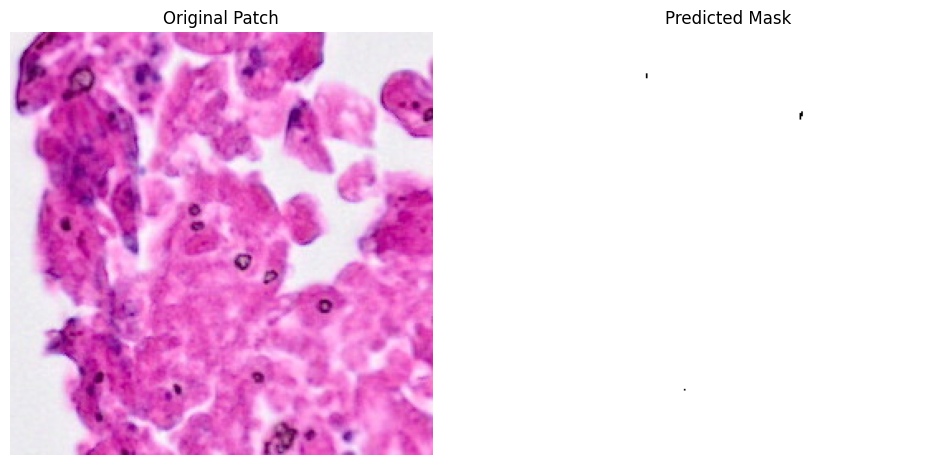

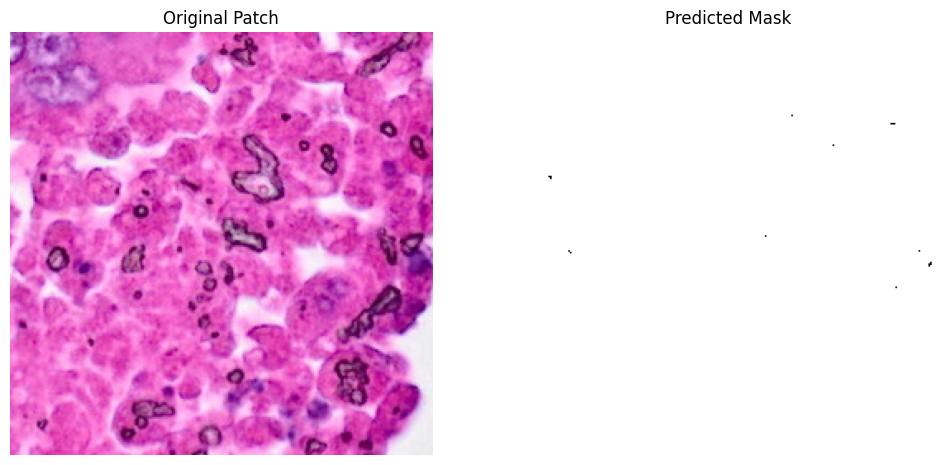

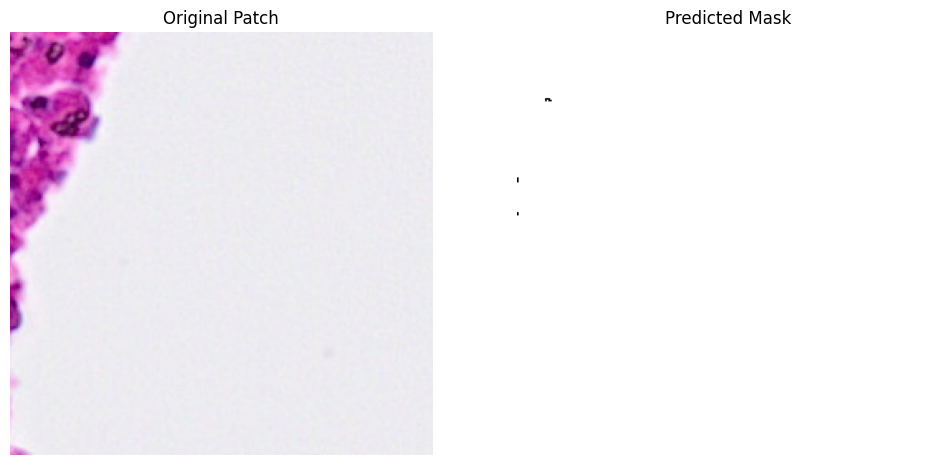

In [155]:
# 3 random patches
random_indices = random.sample(range(len(patches)), 3)
for i in random_indices:
    patch, _ = patches[i]
    pred, _ = predictions_thresholded[i]
    
    plot_patch_vs_mask(patch, pred)